In [1]:
using LowLevelFEM
import LowLevelFEM as FEM

gmsh.initialize()

In [2]:
using SparseArrays, LinearAlgebra

In [3]:
gmsh.open("body2L.geo")

Info    : Reading 'body2L.geo'...
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 20%] Meshing curve 3 (Line)
Info    : [ 30%] Meshing curve 4 (Line)
Info    : [ 40%] Meshing curve 5 (Line)
Info    : [ 50%] Meshing curve 6 (Line)
Info    : [ 60%] Meshing curve 7 (Line)
Info    : [ 60%] Meshing curve 8 (Line)
Info    : [ 70%] Meshing curve 9 (Line)
Info    : [ 80%] Meshing curve 10 (Line)
Info    : [ 90%] Meshing curve 11 (Line)
Info    : [100%] Meshing curve 12 (Line)
Info    : Done meshing 1D (Wall 0.00103957s, CPU 0.001036s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Transfinite)
Info    : [ 20%] Meshing surface 2 (Transfinite)
Info    : [ 40%] Meshing surface 3 (Transfinite)
Info    : [ 60%] Meshing surface 4 (Transfinite)
Info    : [ 70%] Meshing surface 5 (Transfinite)
Info    : [ 90%] Meshing surface 6 (Transfinite)
Info    : Done meshing 2D (Wall 0.000618251s, CPU 0.000616s)
Info    : Meshing 3D

In [4]:
hooke = FEM.material("body", E=260, ν=0.3)
nonlin = FEM.material("body", E=260, ν=0.3, type=:StVenantKirchhoff)
nonlin = FEM.material("body", E=260, ν=0.3, type=:NeoHookeCompressible)
linelast = FEM.Problem([hooke])
nonlinelast = FEM.Problem([nonlin])

Problem("body2L", :Solid, 3, 3, Material[Material("body", :NeoHookeCompressible, 260.0, 0.3, 150.0, 100.0, 216.66666666666663, 7.85e-9, 45.0, 4.2e8, 1.2e-5, 1.0e-7, 0.1, 1.0)], 1.0, 525, LowLevelFEM.Geometry("", "", 0, 0, nothing, nothing, nothing, nothing))

In [5]:
left = FEM.displacementConstraint("left", ux=0, uy=0, uz=0)
right = FEM.displacementConstraint("right", ux=0)

BoundaryCondition("right", 0, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing)

In [6]:
fy(x, y, z) = (-z + 0.5) * 10
fz(x, y, z) = (y - 0.5) * 10
load = FEM.load("right", fy=fy, fz=fz)

BoundaryCondition("right", nothing, nothing, nothing, nothing, nothing, nothing, nothing, Main.fy, Main.fz, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing)

In [8]:
q = FEM.solveDisplacement(linelast, load=[load], support=[left, right])
A1 = FEM.solveStrain(q)
F1 = FEM.solveStress(q)

TensorField
[[-9.454801547095017e-13; 2.6553746288253053; … ; -0.22797154004264922; -0.9554500722638559;;], [-6.632576432519244e-13; 1.0694912150809346; … ; 0.06309965047366639; -0.07516121542181994;;], [-5.745924569477978e-13; 1.0937769525476606; … ; -0.010637356588669156; 0.05260688049251909;;], [-5.257174903738893e-13; 1.1375480457272393; … ; 0.0011426744545406375; -0.012553591169671766;;], [-3.853998283703808e-13; 1.1248040750944903; … ; -3.9471785279188154e-5; 0.0019773403691612963;;], [-3.1569229652292363e-13; 1.1269828647194335; … ; -1.0938816075167779e-5; -0.00020805468768951216;;], [-1.4732231276917696e-13; 1.1267526961176833; … ; 1.319815273737035e-6; 1.0800699662937008e-5;;], [-7.180067900913051e-15; 1.1267578398674676; … ; 5.51335366250072e-7; -6.782942211375209e-8;;], [-4.129230137206669e-14; 1.126761110857477; … ; -2.9242355203962234e-7; 4.106654820888733e-7;;], [1.934418641191292e-13; 1.1267605759985921; … ; 2.7431923399490188e-8; -5.795443890413421e-8;;]  …  [-5.0044490

In [9]:
u1 = FEM.showDoFResults(q, :uvec)

1

In [10]:
FEM.showElementResults(A1, :ex)
FEM.showElementResults(A1, :ey)
FEM.showElementResults(A1, :ez)
FEM.showElementResults(A1, :exy)
FEM.showElementResults(A1, :eyz)
FEM.showElementResults(A1, :ezx)

7

In [11]:
r, e = FEM.solveDeformation(nonlinelast, [load], [left, right],
    followerLoad=true,
    loadSteps=50,
    rampedLoad=true,
    rampedSupport=false,
    maxIteration=10,
    saveSteps=true,
    saveIterations=false,
    plotConvergence=true,
    relativeError=1e-3
)

(VectorField(Matrix{Float64}[], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.7499999999999999 0.7293977363010482 … 0.4206556500501503 0.4184040762385035; 0.75 0.7690359349082642 … 0.8440312785684128 0.843494011082601], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0  …  42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0], Int64[], 51, :v3D, Problem("body2L", :Solid, 3, 3, Material[Material("body", :NeoHookeCompressible, 260.0, 0.3, 150.0, 100.0, 216.66666666666663, 7.85e-9, 45.0, 4.2e8, 1.2e-5, 1.0e-7, 0.1, 1.0)], 1.0, 525, LowLevelFEM.Geometry("", "", 0, 0, nothing, nothing, nothing, nothing))), Any[0.004475489571382885, 0.0006053266120672111, 0.0009331358505894708, 0.003137701047122455, 0.0002551473218413557, 0.0025155561935217134, 0.0005814236212489303, 0.0031546211872551196, 0.0007024539836009609, 0.0032088942574588684  …  0.0012335859849152654, 0.0007104748470863288, 0.00127013630904604, 0.0007676851384105174, 0.0013141782648035051, 0.000831833546127749, 0.0013660910910

In [12]:
r1 = FEM.showDeformationResults(r, :uvec)

8

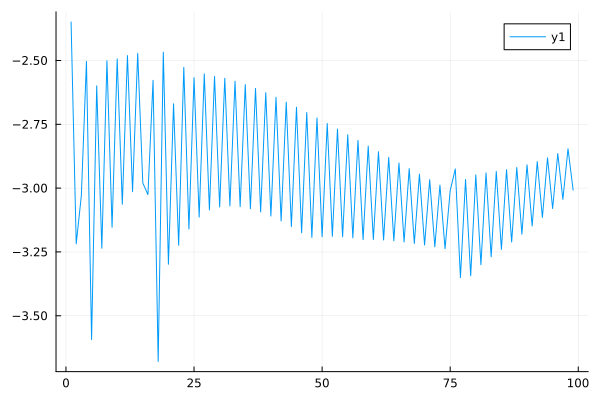

In [13]:
using Plots
plot(log10.(e))

In [14]:
FEM.probe(r, 5, 0.3, 0.3, step=r.nsteps)

3-element Vector{Float64}:
 5.0008305778
 0.4306724015
 0.2257218926

In [15]:
FEM.probe(r, "A", step=r.nsteps)

3-element Vector{Float64}:
 9.0014774087
 0.4231309311
 0.9173527333

In [16]:
D = q ∘ ∇

TensorField
[[-2.7013718705985766e-15; 0.026553746288253053; … ; -0.0536199176119233; 0.00016297337733931633;;], [-3.032228553175984e-15; 0.028428272921413384; … ; -0.10974644088747738; -0.00010565960493005844;;], [-2.510050617745824e-15; 0.028129527879078173; … ; -0.16628036056917256; 3.639450085460294e-5;;], [-2.181012564731882e-15; 0.028175612871686892; … ; -0.22256273455150816; -9.397756251888767e-6;;], [-1.7570517946566373e-15; 0.028167640208520944; … ; -0.278911564872057; 2.061960729937695e-6;;], [-1.3539973357221493e-15; 0.02816935156416206; … ; -0.3352479980617099; -4.1780688930792564e-7;;], [-8.262975020203963e-16; 0.028168928565259654; … ; -0.3915862116674995; 8.452061550645595e-8;;], [-3.3916954449056194e-16; 0.02816903498542836; … ; -0.4479242197718835; -1.8131869783388765e-8;;], [9.613643644430006e-17; 0.028169009221360813; … ; -0.5042622516655481; 4.04318878377552e-9;;], [3.623670933856799e-16; 0.0281690150275401; … ; -0.5606002788173797; -3.186261254839451e-10;;]  …  [-1

In [17]:
A2 = (D + D') / 2

TensorField
[[-2.7013718705985766e-15; 0.013276873144126526; … ; -0.0011398577002132496; 0.00016297337733931633;;], [-3.032228553175984e-15; 0.005347456075404681; … ; 0.0003154982523683389; -0.00010565960493005844;;], [-2.510050617745824e-15; 0.005468884762738303; … ; -5.318678294334578e-5; 3.639450085460294e-5;;], [-2.181012564731882e-15; 0.005687740228636176; … ; 5.713372272675432e-6; -9.397756251888767e-6;;], [-1.7570517946566373e-15; 0.005624020375472445; … ; -1.973589263681852e-7; 2.061960729937695e-6;;], [-1.3539973357221493e-15; 0.005634914323597178; … ; -5.469408032032774e-8; -4.1780688930792564e-7;;], [-8.262975020203963e-16; 0.005633763480588335; … ; 6.599076368685175e-9; 8.452061550645595e-8;;], [-3.3916954449056194e-16; 0.005633789199337167; … ; 2.756676803494784e-9; -1.8131869783388765e-8;;], [9.613643644430006e-17; 0.0056338055542873855; … ; -1.4621177046869605e-9; 4.04318878377552e-9;;], [3.623670933856799e-16; 0.0056338028799929555; … ; 1.3715967250860217e-10; -3.186261

In [18]:
FEM.probe(q, 9, 0.8, 0.8)

3-element Vector{Float64}:
  0.0
 -0.3033791313
  0.3033791313

In [19]:
FEM.probe(A1, 9, 0.8, 0.8)

3×3 Matrix{Float64}:
 -0.0         -0.00851159   0.00851159
 -0.00851159   4.53547e-5  -0.0
  0.00851159  -0.0         -4.53547e-5

In [20]:
FEM.probe(A2, 9, 0.8, 0.8)

3×3 Matrix{Float64}:
 -0.0         -0.00851159   0.00851159
 -0.00851159   4.53547e-5  -0.0
  0.00851159  -0.0         -4.53547e-5

In [21]:
A11 = FEM.elementsToNodes(A1)
A22 = FEM.elementsToNodes(A2)

TensorField
[3.868406246373968e-14; -0.026152667041324067; … ; 6.938893903907228e-17; 0.00020560496768440292;;]

In [22]:
FEM.probe(A11, 9, 0.8, 0.8)

3×3 Matrix{Float64}:
 -0.0        -0.0125299     0.0125299
 -0.0125299   0.000105395  -0.0
  0.0125299  -0.0          -0.000105395

In [23]:
FEM.probe(A22, 9, 0.8, 0.8)

3×3 Matrix{Float64}:
 -0.0        -0.0125299     0.0125299
 -0.0125299   0.000105395  -0.0
  0.0125299  -0.0          -0.000105395

In [24]:
Ex = linelast.material[1].E
ν = linelast.material[1].ν
I = unitTensor(A2)
F2 = Ex / (1 + ν) * (A2 + ν / (1 - 2ν) * I * trace(A2))

TensorField
[[-9.454801547095017e-13; 2.6553746288253053; … ; -0.2279715400426499; -0.9554500722638584;;], [-6.639843199290025e-13; 1.0694912150809361; … ; 0.06309965047366778; -0.07516121542181993;;], [-5.745940708652804e-13; 1.0937769525476606; … ; -0.010637356588669156; 0.05260688049251962;;], [-5.184131591146264e-13; 1.1375480457272351; … ; 0.0011426744545350864; -0.012553591169671766;;], [-3.859845497723535e-13; 1.124804075094489; … ; -3.947178527363704e-5; 0.001977340369161296;;], [-3.156922980522025e-13; 1.1269828647194355; … ; -1.0938816064065549e-5; -0.00020805468768821112;;], [-1.3677449707196638e-13; 1.126752696117667; … ; 1.319815273737035e-6; 1.080069964480915e-5;;], [-1.0046960793828047e-14; 1.1267578398674334; … ; 5.513353606989568e-7; -6.782942211375275e-8;;], [-4.1292301434393883e-14; 1.126761110857477; … ; -2.924235409373921e-7; 4.1066548208887343e-7;;], [1.9344186411625954e-13; 1.126760575998591; … ; 2.7431934501720434e-8; -5.795443890413421e-8;;]  …  [-5.00444903841

In [25]:
FEM.probe(F1, 9, 0.8, 0.8)

3×3 Matrix{Float64}:
 -0.0      -1.70232      1.70232
 -1.70232   0.00907094  -0.0
  1.70232  -0.0         -0.00907094

In [26]:
FEM.probe(F2, 9, 0.8, 0.8)

3×3 Matrix{Float64}:
 -0.0      -1.70232      1.70232
 -1.70232   0.00907094  -0.0
  1.70232  -0.0         -0.00907094

In [27]:
FEM.showElementResults(A2, :ex)
FEM.showElementResults(A2, :ey)
FEM.showElementResults(A2, :ez)
FEM.showElementResults(A2, :exy)
FEM.showElementResults(A2, :eyz)
FEM.showElementResults(A2, :ezx)

14

In [28]:
FEM.openPostProcessor()

-------------------------------------------------------
Version       : 4.13.1
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 19700101
Build host    : amdci7.julia.csail.mit.edu
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blossom Cairo DIntegration Dlopen DomHex Eigen[contrib] Fltk GMP Gmm[contrib] Hxt Jpeg Kbipack LinuxJoystick MathEx[contrib] Mesh Metis[contrib] Mmg Mpeg Netgen Nii2mesh ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OpenMP OptHom Parser Plugins Png Post QuadMeshingTools QuadTri Solver TetGen/BR TinyXML2[contrib] Untangle Voro++[contrib] WinslowUntangler Zlib
FLTK version  : 1.3.8
OCC version   : 7.7.2
Packaged by   : root
Web site      : https://gmsh.info
Issue tracker : https://gitlab.onelab.info/gmsh/gmsh/issues
-------------------------------------------------------


XOpenIM() failed
XRequest.18: BadValue 0x0
Fontconfig warning: using without calling FcInit()


In [29]:
gmsh.finalize()